<a href="https://colab.research.google.com/github/annisapraditha/MLtugas7/blob/main/CBIR_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive/ML

/content/drive/My Drive/ML


In [5]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/ML/chest_xray.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
cd /tmp/chest_xray

/tmp/chest_xray


In [62]:
%ls

test/  train/  tugasml.h5


In [63]:
import os
import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import confusion_matrix
from tensorflow.keras import callbacks
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
train_dir = 'train'
test_dir = 'test'

In [65]:
import cv2
import numpy as np
import os

test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [66]:
import cv2
import numpy as np
import os

train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [67]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (856, 100, 100, 3)
Train Label =  (856,)
Test Data =  (624, 100, 100, 3)
Test Label =  (624,)


In [69]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", test_data[0][0][0])

x_test = test_data.astype('float32') / 255.0
x_train = train_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_test[0][0][0])

Data sebelum di-normalisasi  [6 6 6]
Data setelah di-normalisasi  [0.02352941 0.02352941 0.02352941]


In [70]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", test_label[100:110])

lb = LabelEncoder()
y_test = lb.fit_transform(test_label)
y_train = lb.fit_transform(train_label)

print("Label setelah di-encoder ", y_test[100:110])

Label sebelum di-encoder  ['NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL'
 'NORMAL' 'NORMAL']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0]


In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./225,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [72]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(250,250),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(250,250),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

Found 856 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[100,100,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=516, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [78]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [79]:
# Print model summary
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 13, 13, 64)      

In [81]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001), 
              loss='binary_crossentropy', 
              metrics=['acc'])
H = model.fit(x_test, y_test, batch_size=20, epochs=15, validation_data=(x_train, y_train))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15
32/32 [==============================] - 14s 422ms/step - loss: 0.3187 - acc: 0.8814 - val_loss: 0.3691 - val_acc: 0.8364
Epoch 2/15
32/32 [==============================] - 13s 415ms/step - loss: 0.2849 - acc: 0.8878 - val_loss: 0.2825 - val_acc: 0.9136
Epoch 3/15
32/32 [==============================] - 13s 419ms/step - loss: 0.2441 - acc: 0.8990 - val_loss: 0.2744 - val_acc: 0.8960
Epoch 4/15
32/32 [==============================] - 13s 418ms/step - loss: 0.2212 - acc: 0.9103 - val_loss: 0.2887 - val_acc: 0.8879
Epoch 5/15
32/32 [==============================] - 13s 419ms/step - loss: 0.2072 - acc: 0.9151 - val_loss: 0.2817 - val_acc: 0.8773
Epoch 6/15
32/32 [==============================] - 13s 416ms/step - loss: 0.1836 - acc: 0.9279 - val_loss: 0.2890 - val_acc: 0.8750
Epoch 7/15
32/32 [==============================] - 13s 416ms/step - loss: 0.2030 - acc: 0.9215 - val_loss: 0.2640 - val_acc: 0.8972
Epoch 8/15
32/32 [==============================] - 13s 417ms/step - 

In [82]:
print("waktu = ", time.time() - start, "detik")

waktu =  1521.9028732776642 detik


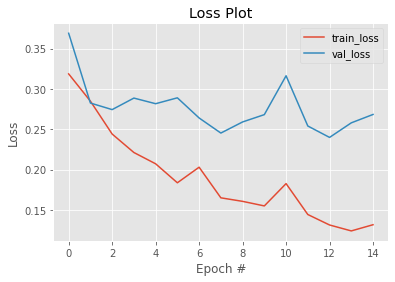

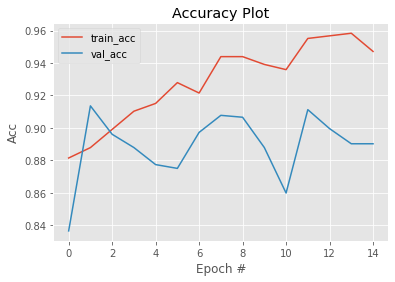

In [83]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [84]:
from sklearn.metrics import classification_report

pred = model.predict(x_train)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_train, labels))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       374
           1       0.95      0.85      0.90       482

    accuracy                           0.89       856
   macro avg       0.89      0.90      0.89       856
weighted avg       0.90      0.89      0.89       856



In [85]:
from keras.models import save_model
model = save_model(model,'tugasml(1).h5')